<h1>Modele epidemiologiczne</h1>
<h4>Legenda o pompie przy Broad Street</h4>
<p1>W połowie XIX wieku w Londynie panowała straszliwa epidemia cholery. Ówcześni najwięksi uczeni wierzyli w teorię miazmatów - uważali, że choroby biorą się ze „złego powietrza” i smrodu gnijących odpadków. </p1> 


<p2>Skromny lekarz John Snow (nie ten z "Gry o Tron"), miał jednak inne podejrzenie: uważał, że choroba przenosi się przez brudną wodę. Problem polegał na tym, że nikt mu nie wierzył, bo nikt nie widział bakterii (mikroskopy były jeszcze w powijakach).</p2>


<p3>Zamiast kłócić się z profesorami, Snow zrobił coś, co dziś nazwalibyśmy przestrzennym modelem epidemiologicznym. Wziął mapę dzielnicy Soho i zaczął stawiać czarne kreski tam, gdzie odnotowano zgony. Szybko zauważył coś fascynującego: czarne kreski gęstniały wokół jednej, konkretnej pompy wodnej na Broad Street.</p3>


<h4>Motywacja</h4>
<p1>W ostatnich latach obserwujemy rozwój narzędzi analitycznych oraz modeli matematycznych, które to umożliwiają coraz dokładniejsze przewidywanie przebiegu np. zjawisk epidemiologicznych.
Postęp ten sprawił, że prognozowanie rozwoju epidemii stało się kluczowym elementem wspierającym podejmowanie decyzji
w zakresie zdrowia publicznego.</p1>


<p2>Celem niniejszego projektu jest zapoznanie się z wybranymi modelami opisującymi rozprzestrzenianie się chorób zakaźnych
oraz analiza ich właściwości i ograniczeń. Skupimy się na zrozumieniu mechanizmów stojących za tymi modelami,
a także na interpretacji otrzymywanych wyników w kontekście rzeczywistych danych.</p2>


<h5>Model SIR</h5>
<p1>Jednym z najprostszych i jednocześnie dosyć dokładnych modeli jest model <b>SIR</b>, opracowany w 1927 roku.<sup><a href="https://link.springer.com/article/10.1007/BF02464423">[1]</a></sup> Zakłada on ustaloną populację podzieloną na trzy podgrupy: <b>S</b> - Susceptible (podatni), <b>I</b> - Infected (zarażeni), <b>R</b> - Recovered (ozdrowieńcy). Każda z grup jest opisana jednym równaniem różniczkowym, które razem tworzą następujący układ równań różniczkowych:</p1>


$$\begin{cases}
\dfrac{dS}{dt} = -\dfrac{\beta}{N}IS\\[8pt]
\dfrac{dI}{dt} = \dfrac{\beta}{N}IS-\gamma I\\[8pt]
\dfrac{dR}{dt} = \gamma I
\end{cases}$$

<p1>gdzie:  
$N$ - rozmiar populacji,  
$\beta$ - współczynnik infekcji,  
$\gamma$ - współczynnik ozdrowienia.</p1> $x$

<h3>Metody numeryczne</h3>
Rozwiązywanie układów równań różniczkowych może niekiedy okazać się trudne, zwłaszcza jeśli chcemy rozwiązywać je w sposób algorytmiczny. O wiele prostszym i zwykle wystarczającym rozwiązaniem jest przybliżenie wyników za pomocą <b>metod numerycznych</b>. Poniżej demonstrujemy przykładowe algorytmy w języku python.
<h5>Metoda Eulera</h5>
Pierwszy raz opublikowana przez Leonharda Eulera w 1768 roku<sup><a href="cwel.pl">[przypis]</a></sup>, polega na szacowaniu kształtu krzywej na podstawie wartości pochodnej w punkcie.

Niech: 
$$\begin{cases}
y=y(t)\\
y(0)=y_0\\
y'=f(t,y)\\
\end{cases}$$
Załóżmy, że chcemy przybliżyć kształt krzywej poprzez przybliżanie wartości $y$ w ciągu punktów $(y_1, y_2, y_3, \ldots)$ o równych interwałach $h$. Styczną do krzywej w punkcie $(0, y_0)$ możemy łatwo wyznaczyć wstawiając wartości do $f$. Dla dostatecznie małego $h$, wyznaczona styczna będzie dobrym przybliżeniem kształtu krzywej na interwale, więc wystarczy przyjąć styczną jako wzór krzywej.

Możemy zapisać to w następujący sposób:
$$\begin{aligned}
y_1 &\approx y_0 + hy'_0\\
y_1 &\approx y_0 + hf(0,y_0)
\end{aligned}$$
Dla $y_2$ stosujemy dokładnie to samo rozumowanie, tym razem przyjmując $y_1$ jako znaną wartość funkcji $y$. Ogólnie:
$$y_n \approx y_{n-1} + hf(t_{n-1},y_{n-1})$$

##### [rysunek]

Taki sposób przybliżania kształtu krzywej jest bardzo prosty do zaprogramowania:

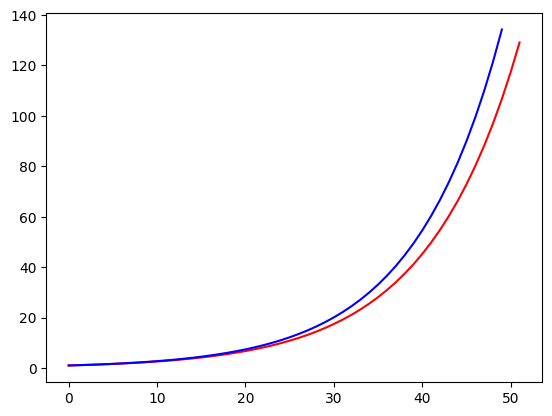

In [ ]:
def euler_demo(f, y0, tlim, step = 0.1): #f powinna być funkcją postaci f(t:float, y:float)->float
    y, t = [y0], 0 #lista przybliżonych wartości, czas
    while t < tlim:
        dy = f(t, y[-1]) #pochodna w punkcie
        y.append(y[-1] + (dy*step)) #przybliżenie wartości y za pomocą pochodnej
        t += step
    return y

from math import e
y1 = euler_demo(lambda t, y: y, 1, 5) #równanie y'=y, y0=1
y2 = [e**(t/10) for t in range(50)] #rozwiązanie analityczne czyli e^t

import matplotlib.pyplot as plt
plt.plot(y1, color='red')
plt.plot(y2, color='blue')
plt.show()
